<a href="https://colab.research.google.com/github/rushiraj-gohil/Data-Analytics/blob/master/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
#portfolio optimization

In [100]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime  import datetime
import matplotlib.pyplot as plot

In [101]:
plot.style.use('classic')

In [102]:
syms = ['SBIN.NS', 'AXISBANK.BO', 'IOC.BO', 'NMDC.BO', 'KRITIIND.BO']

In [103]:
#assigning weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [104]:
#assigning the start date
stockStartDate = '2016-07-02'

In [105]:
#ending date
stockEndDate = '2019-01-01'

In [106]:
df = pd.DataFrame()

In [107]:
for stocks in syms:
  df[stocks] = web.DataReader(stocks, data_source='yahoo' , start= stockStartDate, end= stockEndDate) ['Adj Close']

In [108]:
#showing df
df

,SBIN.NS,AXISBANK.BO,IOC.BO,NMDC.BO,KRITIIND.BO
Date,,,,,
2016-07-04,221.001373,532.954468,86.017426,76.553299,26.071943
2016-07-05,221.496887,528.740967,85.631729,77.322891,26.465483
2016-07-07,218.077820,536.505005,84.967377,77.525406,27.104982
2016-07-08,216.343506,540.461121,84.069580,76.674820,25.186483
2016-07-11,222.686127,538.384094,85.766045,77.970955,26.367098
...,...,...,...,...,...
2018-12-27,292.149994,616.734131,125.562225,83.629471,32.872208
2018-12-28,294.799988,624.474548,128.934280,86.296570,33.219273
2018-12-31,295.899994,619.031250,128.419113,87.697929,32.773045


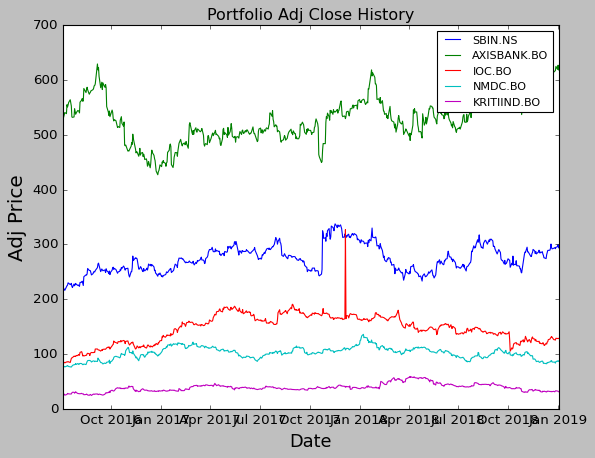

In [109]:
#making graphical representation
title = 'Portfolio Adj Close History'
my_stocks = df
for c in my_stocks.columns.values:
  plot.plot(my_stocks[c] , label = c)

  plot.title(title)
  plot.xlabel('Date' , fontsize = 16)
  plot.ylabel('Adj Price' , fontsize = 18)
  plot.legend(my_stocks.columns.values, loc = 'upper right', fontsize = 10)



In [110]:
#showing daily returns
returns = df.pct_change()
returns

,SBIN.NS,AXISBANK.BO,IOC.BO,NMDC.BO,KRITIIND.BO
Date,,,,,
2016-07-04,NaN,NaN,NaN,NaN,NaN
2016-07-05,0.002242,-0.007906,-0.004484,0.010053,0.015094
2016-07-07,-0.015436,0.014684,-0.007758,0.002619,0.024164
2016-07-08,-0.007953,0.007374,-0.010566,-0.010972,-0.070780
2016-07-11,0.029317,-0.003843,0.020179,0.016904,0.046875
...,...,...,...,...,...
2018-12-27,-0.006799,0.001054,-0.004826,-0.022199,0.049051
2018-12-28,0.009071,0.012551,0.026856,0.031892,0.010558
2018-12-31,0.003731,-0.008717,-0.003996,0.016239,-0.013433


In [111]:
#creating annual covariance matrix
cov_annual_matrix = returns.cov() * 252
cov_annual_matrix

,SBIN.NS,AXISBANK.BO,IOC.BO,NMDC.BO,KRITIIND.BO
SBIN.NS,0.113107,0.039207,0.013759,0.031721,0.018241
AXISBANK.BO,0.039207,0.081490,0.013706,0.022117,0.010638
IOC.BO,0.013759,0.013706,0.604052,0.012789,-0.003664
NMDC.BO,0.031721,0.022117,0.012789,0.099040,0.034293
KRITIIND.BO,0.018241,0.010638,-0.003664,0.034293,0.283266


In [112]:
#calculating the portfolio variance
port_var = np.dot( weights.T, np.dot(cov_annual_matrix , weights))
port_var

0.06266276889389306

In [113]:
#calculating volatility / standard deviation 
port_vol = np.sqrt(port_var)
port_vol

0.25032532611362573

In [114]:
 #calculating annual portfolio return
port_annual_return = np.sum(returns.mean() *weights) * 252
port_annual_return  

0.20224892202970807

In [115]:
pip install PyPortfolioOpt

In [116]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [117]:
#portfolio optimization begins here
#calculating expected returns and annual covariance matrix of asset returns
mean = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [118]:
#optimising for maximum sharpe ratio
ef = EfficientFrontier(mean , S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('SBIN.NS', 0.37345), ('AXISBANK.BO', 0.10277), ('IOC.BO', 0.23275), ('NMDC.BO', 0.06551), ('KRITIIND.BO', 0.22552)])
Expected annual return: 22.7%
Annual volatility: 27.7%
Sharpe Ratio: 0.75


(0.22711726246623315, 0.276911864200801, 0.7479537327300766)